<a href="https://colab.research.google.com/github/ThaisLasso/repo/blob/main/Lista_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Nos exercı́cios abaixo, considere as seguintes conexões entre cidades e o custo para trafegar entre elas. Considere A como estado inicial e F como estado meta.


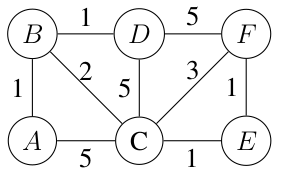




In [ ]:
grafo = {
    'A' : ['B','C'],
    'B' : ['A','C','D'],
    'C' : ['A','B','D','E','F'],
    'D' : ['B','C','F'],
    'E' : ['C','F'],
    'F' : ['C','D','E']
}

global custo
custo = {
    'AB' : 1,    'AC' : 5,    'BC' : 2,    'BD' : 1,
    'CD' : 5,    'CE' : 1,    'CF' : 3,    'DF' : 5,
    'EF' : 1,    'BA' : 1,    'CA' : 5,    'CB' : 2,
    'DB' : 1,    'DC' : 5,    'EC' : 1,    'FC' : 3,
    'FD' : 5,    'FE' : 1
}

In [ ]:
def ExpandeSemRepetir(escolhido,grafo,fronteira,nos_union):
  for no in grafo[escolhido[-1]]:
    if no not in nos_union:
      fronteira.add( escolhido + no )
      nos_union.add(no)
  return fronteira,nos_union

def ExpandeRepetindo(escolhido,grafo,fronteira,nos_union):
  for no in grafo[escolhido[-1]]:
    fronteira.add( escolhido + no )
    nos_union.add(no)
  return fronteira,nos_union

def Busca(grafo,ini,fim,EscolheNo,Expande):
  fronteira = {ini}
  explorado = set()
  nos_union = {ini}
  while True:
    print(fronteira)
    if len(fronteira) == 0:
      return False
    escolhido = EscolheNo(fronteira)
    fronteira.remove(escolhido)
    print(escolhido)
    if escolhido[-1] == fim:
      return True
    explorado.add(escolhido)
    nos_union.add(escolhido[-1])
    fronteira,nos_union = Expande(escolhido,grafo,fronteira,nos_union)

1. **Busca Cega:** desenhe a árvore de busca para cada um dos algoritmos abaixo. Utilize a ordem alfabética para desempate entre nós a serem expandidos. Indique na árvore a ordem em que os nós foram expandidos.

(1.a) Busca em largura sem repetir nós na árvore.

In [ ]:
def EscolheNoLargura(fronteira):
  escolhido = 'F'*100
  for no in fronteira:
    if len(no) < len(escolhido):
      escolhido = no
    elif len(no) == len(escolhido) and no[-1] < escolhido[-1]:
      escolhido = no
  return escolhido

print('Ordem dos nós expandidos:')
Busca(grafo,'A','F',EscolheNoLargura,ExpandeSemRepetir)


Ordem dos nós expandidos:
{'A'}
A
{'AC', 'AB'}
AB
{'AC', 'ABD'}
AC
{'ACE', 'ACF', 'ABD'}
ABD
{'ACE', 'ACF'}
ACE
{'ACF'}
ACF


True

(1.b) Busca em largura sem checar para repetição de nós (permita que nós sejam repetidos).

In [ ]:
print('Ordem dos nós expandidos:')
Busca(grafo,'A','F',EscolheNoLargura,ExpandeRepetindo)

Ordem dos nós expandidos:
{'A'}
A
{'AC', 'AB'}
AB
{'ABA', 'AC', 'ABD', 'ABC'}
AC
{'ABA', 'ACA', 'ACD', 'ACF', 'ACB', 'ACE', 'ABD', 'ABC'}
ABA
{'ACA', 'ACD', 'ACF', 'ABAB', 'ACB', 'ABAC', 'ACE', 'ABD', 'ABC'}
ACA
{'ACAB', 'ACD', 'ACF', 'ABAB', 'ACB', 'ABAC', 'ACAC', 'ACE', 'ABD', 'ABC'}
ACB
{'ACAB', 'ACD', 'ACF', 'ABAB', 'ABAC', 'ACAC', 'ACE', 'ACBA', 'ACBC', 'ABD', 'ACBD', 'ABC'}
ABC
{'ACAB', 'ACD', 'ABAC', 'ABCA', 'ABCF', 'ACBC', 'ABD', 'ABCB', 'ACF', 'ABAB', 'ABCE', 'ACAC', 'ACE', 'ACBA', 'ABCD', 'ACBD'}
ACD
{'ACAB', 'ABAC', 'ABCA', 'ABCF', 'ACBC', 'ABD', 'ABCB', 'ACF', 'ABAB', 'ACDC', 'ABCE', 'ACAC', 'ACE', 'ACBA', 'ABCD', 'ACBD', 'ACDF', 'ACDB'}
ABD
{'ACAB', 'ABAC', 'ABCA', 'ABCF', 'ACBC', 'ABCB', 'ABDF', 'ACF', 'ABAB', 'ABDB', 'ABDC', 'ACDC', 'ABCE', 'ACAC', 'ACE', 'ACBA', 'ABCD', 'ACBD', 'ACDF', 'ACDB'}
ACE
{'ACEC', 'ACAB', 'ABAC', 'ABCA', 'ABCF', 'ACBC', 'ACEF', 'ABCB', 'ABDF', 'ACF', 'ABAB', 'ABDB', 'ABDC', 'ACDC', 'ABCE', 'ACAC', 'ACBA', 'ABCD', 'ACBD', 'ACDF', 'ACDB'}
ACF


True

(1.c) Busca em profundidade sem repetir nós na árvore.

In [ ]:
def EscolheNoProfundidade(fronteira):
  escolhido = ''
  for no in fronteira:
    if len(no) > len(escolhido):
      escolhido = no
    elif len(no) == len(escolhido) and no[-1] < escolhido[-1]:
      escolhido = no
  return escolhido

print('Ordem dos nós expandidos:')
Busca(grafo,'A','F',EscolheNoProfundidade,ExpandeSemRepetir)

Ordem dos nós expandidos:
{'A'}
A
{'AC', 'AB'}
AB
{'AC', 'ABD'}
ABD
{'AC', 'ABDF'}
ABDF


True

(1.d) Busca em profundidade limitada (ℓ = 6 nós) sem checar para repetição de nós (permita que nós sejam repetidos).

In [ ]:
global l
l = 6
def ExpandeLimitada(escolhido,grafo,fronteira,nos_union):
  if len(escolhido) >= l:
    return fronteira,nos_union
  for no in grafo[escolhido[-1]]:
    fronteira.add( escolhido + no )
    nos_union.add(no)
  return fronteira,nos_union

print('Ordem dos nós expandidos:')
Busca(grafo,'A','F',EscolheNoProfundidade,ExpandeLimitada)

Ordem dos nós expandidos:
{'A'}
A
{'AC', 'AB'}
AB
{'ABA', 'AC', 'ABD', 'ABC'}
ABA
{'ABAB', 'AC', 'ABAC', 'ABD', 'ABC'}
ABAB
{'ABABC', 'ABABA', 'AC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABA
{'ABABC', 'ABABAB', 'AC', 'ABABAC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABAB
{'ABABC', 'AC', 'ABABAC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABAC
{'ABABC', 'AC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABC
{'ABABCF', 'ABABCD', 'ABABCA', 'ABABCB', 'ABABCE', 'AC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABCA
{'ABABCF', 'ABABCD', 'ABABCB', 'ABABCE', 'AC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABCB
{'ABABCF', 'ABABCD', 'ABABCE', 'AC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABCD
{'ABABCF', 'ABABCE', 'AC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABCE
{'ABABCF', 'AC', 'ABAC', 'ABABD', 'ABD', 'ABC'}
ABABCF


True

(1.e) Busca em profundidade iterativa sem checar para repetição de nós (permita que nós sejam repetidos).

In [ ]:
l=1
resultado = False
while resultado == False:
  print('Ordem dos nós expandidos com profundidade',l)
  resultado = Busca(grafo,'A','F',EscolheNoProfundidade,ExpandeLimitada)
  l = l+1

Ordem dos nós expandidos com profundidade 1
{'A'}
A
set()
Ordem dos nós expandidos com profundidade 2
{'A'}
A
{'AC', 'AB'}
AB
{'AC'}
AC
set()
Ordem dos nós expandidos com profundidade 3
{'A'}
A
{'AC', 'AB'}
AB
{'ABA', 'AC', 'ABD', 'ABC'}
ABA
{'AC', 'ABD', 'ABC'}
ABC
{'AC', 'ABD'}
ABD
{'AC'}
AC
{'ACA', 'ACD', 'ACF', 'ACB', 'ACE'}
ACA
{'ACD', 'ACF', 'ACB', 'ACE'}
ACB
{'ACD', 'ACF', 'ACE'}
ACD
{'ACF', 'ACE'}
ACE
{'ACF'}
ACF


(1.f) Busca de custo uniforme (desempate pelo nó mais raso e depois pela ordem alfabética). Quando ocorrer nós repetidos, mantenha apenas o de menor custo acumulado.

In [ ]:
def CustoAcumulado(escolhido):
  accum = 0
  for i in range(len(escolhido)-1):
    accum = accum + custo[escolhido[i:i+2]]
  return accum

def TrocaSePossivel(escolhido,fronteira):
  for no in fronteira:
    if no[-1] == escolhido[-1]:
      if CustoAcumulado(escolhido) < CustoAcumulado(no):
        fronteira.remove(no)
        fronteira.add(escolhido)
  return fronteira


def ExpandeSemRepetirMenorCusto(escolhido,grafo,fronteira,nos_union):
  for no in grafo[escolhido[-1]]:
    if no not in nos_union:
      fronteira.add( escolhido + no )
      nos_union.add(no)
    else:
      fronteira = TrocaSePossivel(escolhido + no,fronteira)

  return fronteira,nos_union

def EscolheCustoUniforme(fronteira):
  escolhido = 'AC'*10
  for no in fronteira:
    if CustoAcumulado(no) < CustoAcumulado(escolhido):
      escolhido = no
    elif CustoAcumulado(no) == CustoAcumulado(escolhido) and len(no) < len(escolhido):
      escolhido = no
    elif CustoAcumulado(no) == CustoAcumulado(escolhido) and len(no) == len(escolhido) and no[-1] < escolhido[-1]:
      escolhido = no
  return escolhido

print('Ordem dos nós expandidos:')
Busca(grafo,'A','F',EscolheCustoUniforme,ExpandeSemRepetirMenorCusto)

Ordem dos nós expandidos:
{'A'}
A
{'AC', 'AB'}
AB
{'ABD', 'ABC'}
ABD
{'ABDF', 'ABC'}
ABC
{'ABCF', 'ABCE'}
ABCE
{'ABCEF'}
ABCEF


True

**Busca Informada:** desenhe a árvore de busca para cada um dos algoritmos abaixo. Utilize a ordem alfabética para desempate entre nós a serem expandidos. Indique na árvore a ordem em que os nós foram expandidos. Considere a seguinte função heurı́stica:

In [ ]:
global h
h = { 'A' : 3,
      'B' : 2,
      'C' : 1,
      'D' : 3,
      'E' : 1,
      'F' : 0,
      'X' : 1000
     }

(2.a) Busca Gulosa (desempate pelo nó mais raso e depois pela ordem alfabética). Quando ocorrer nós repetidos, mantenha apenas o mais raso.

In [ ]:
def EscolheGulosa(fronteira):
  escolhido = 'X'
  for no in fronteira:
    if h[no[-1]] < h[escolhido[-1]]:
      escolhido = no
    elif h[no[-1]] == h[escolhido[-1]] and len(no) < len(escolhido):
      escolhido = no
    elif h[no[-1]] == h[escolhido[-1]] and len(no) == len(escolhido) and no[-1] < escolhido[-1]:
      escolhido = no
  return escolhido

print('Fronteira e nós expandidos:')
Busca(grafo,'A','F',EscolheGulosa,ExpandeSemRepetir)

Fronteira e nós expandidos:
{'A'}
A
{'AC', 'AB'}
AC
{'ACD', 'ACE', 'ACF', 'AB'}
ACF


True

(2.b) Busca A∗ (desempate pelo nó mais raso e depois pela ordem alfabética). Quando ocorrer nós repetidos, mantenha apenas o de menor custo acumulado.

In [ ]:
def EscolheAestrela(fronteira):
  escolhido = 'AC'*10
  for no in fronteira:
    if CustoAcumulado(no) + h[no[-1]] < CustoAcumulado(escolhido) + h[escolhido[-1]]:
      escolhido = no
    elif CustoAcumulado(no) + h[no[-1]] == CustoAcumulado(escolhido) + h[escolhido[-1]] and len(no) < len(escolhido):
      escolhido = no
    elif CustoAcumulado(no) + h[no[-1]] == CustoAcumulado(escolhido) + h[escolhido[-1]] and len(no) == len(escolhido) and no[-1] < escolhido[-1]:
      escolhido = no
  return escolhido

print('Ordem dos nós expandidos:')
Busca(grafo,'A','F',EscolheAestrela,ExpandeSemRepetirMenorCusto)

Ordem dos nós expandidos:
{'A'}
A
{'AC', 'AB'}
AB
{'ABD', 'ABC'}
ABC
{'ABD', 'ABCE', 'ABCF'}
ABD
{'ABCE', 'ABCF'}
ABCE
{'ABCEF'}
ABCEF


True

**Programação Dinâmica:**

(3.a) Síncrona: utilize a equação abaixo para preencher a tabela abaixo ($N (s)$ são os vizinhos de $s$). Note que em cada iteração $t$ é utilizado os valores da iteração $t − 1$.

  $$V_{t}(s) \gets \min_{s'\in N(s)}\left\{ c(s,s') + V_{t-1}(s')\right\}$$



In [ ]:
V = { 'A' : 0, 'B' : 0, 'C' : 0, 'D' : 0, 'E' : 0, 'F' : 0 }
Vs = [None]*7
Vs[0] = V
print('V{}(s) = {}'.format(0,Vs[0]))
for t in range(1,7):
  Vs[t] = {}
  for s in 'ABCDE':
    values = [];
    for ss in grafo[s]:
      v = custo[s+ss] + Vs[t-1][ss]
      values = values + [v]
    Vs[t][s] = min(values)
  Vs[t]['F'] = 0
  print('V{}(s) = {}'.format(t,Vs[t]))


V0(s) = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
V1(s) = {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 0}
V2(s) = {'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 1, 'F': 0}
V3(s) = {'A': 3, 'B': 3, 'C': 2, 'D': 3, 'E': 1, 'F': 0}
V4(s) = {'A': 4, 'B': 4, 'C': 2, 'D': 4, 'E': 1, 'F': 0}
V5(s) = {'A': 5, 'B': 4, 'C': 2, 'D': 5, 'E': 1, 'F': 0}
V6(s) = {'A': 5, 'B': 4, 'C': 2, 'D': 5, 'E': 1, 'F': 0}


(3.b) Assíncrona: utilize a equação abaixo para preencher a tabela abaixo (da direita para esquerda, de cima para baixo). Em cada iteração utilize os valores de $V(s)$ calculado na iteração anterior.
  
$$ V(s) \gets \min_{s'\in N(s)}\left\{ c(s,s') + V(s')\right\} $$

In [ ]:
V = { 'A' : 0, 'B' : 0, 'C' : 0, 'D' : 0, 'E' : 0, 'F' : 0 }
Vs = [None]*7
Vs[0] = V
print('V{}(s) = {}'.format(0,Vs[0]))
for t in range(1,6):
  Vs[t] = {}
  for s in 'EDCBA':
    values = [];
    for ss in grafo[s]:
      v = custo[s+ss] + V[ss]
      values = values + [v]
    V[s] = min(values)
  Vs[t] = V
  print('V{}(s) = {}'.format(t,Vs[t]))


V0(s) = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
V1(s) = {'A': 2, 'B': 1, 'C': 2, 'D': 1, 'E': 1, 'F': 0}
V2(s) = {'A': 4, 'B': 3, 'C': 2, 'D': 2, 'E': 1, 'F': 0}
V3(s) = {'A': 5, 'B': 4, 'C': 2, 'D': 4, 'E': 1, 'F': 0}
V4(s) = {'A': 5, 'B': 4, 'C': 2, 'D': 5, 'E': 1, 'F': 0}
V5(s) = {'A': 5, 'B': 4, 'C': 2, 'D': 5, 'E': 1, 'F': 0}


**Processos Markoviano de Decisão:** considere a seguinte estocasticidade no resultado das ações; com probabilidade 0.5 a transição escolhida é realizada e com 0.5 retorna-se para o estado inicial (estado $A$).

(4.a) Considere a política que escolhe o seguinte caminho: $A, B, C, E,$ e $F$. Calcule o custo esperado a partir de A.

In [ ]:
n = 200
pi = {
    'A' : 'B',
    'B' : 'C',
    'C' : 'E',
    'D' : 'F',
    'E' : 'F'
}

Versão Value Iteration

In [ ]:
V = { 'A' : 0, 'B' : 0, 'C' : 0, 'D' : 0, 'E' : 0, 'F' : 0 }
print('V{}(s) = {}'.format(0,V))
for t in range(1,n):
  for s in 'EDCBA':
    ss = pi[s]
    V[s] = custo[s+ss] + 0.5*V[ss] + 0.5*V['A']
  if t % 20 == 0:  
    print('V{}(s) = {}'.format(t,V))

V0(s) = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
V20(s) = {'A': 27.54776598424322, 'B': 26.244581585293673, 'C': 21.638212787394576, 'D': 18.425475191596384, 'E': 14.425475191596384, 'F': 0}
V40(s) = {'A': 35.12502115999624, 'B': 33.316686415996486, 'C': 27.70001692799699, 'D': 22.466677951997994, 'E': 18.466677951997994, 'F': 0}
V60(s) = {'A': 37.20921179931399, 'B': 35.261931012693054, 'C': 29.36736943945119, 'D': 23.57824629296746, 'E': 19.57824629296746, 'F': 0}
V80(s) = {'A': 37.782486754461345, 'B': 35.79698763749726, 'C': 29.82598940356908, 'D': 23.88399293571272, 'E': 19.88399293571272, 'F': 0}
V100(s) = {'A': 37.94017106989747, 'B': 35.944159665237635, 'C': 29.952136855917974, 'D': 23.96809123727865, 'E': 19.96809123727865, 'F': 0}
V120(s) = {'A': 37.98354352688567, 'B': 35.98464062509329, 'C': 29.986834821508538, 'D': 23.991223214339026, 'E': 19.991223214339026, 'F': 0}
V140(s) = {'A': 37.995473502419344, 'B': 35.995775268924724, 'C': 29.996378801935478, 'D': 23.99758

Versão Sistema de Equações

In [ ]:
import numpy as np
Ato1 = { 'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5 }
T = np.zeros( (6,6) )
C = np.zeros( (6,1) )
for a in 'ABCDE':
  s = Ato1[a]
  ss = Ato1[pi[a]]
  T[s,ss] += 0.5
  ss = Ato1['A']
  T[s,ss] += 0.5
  C[s,0] = custo[a+pi[a]]
C[5,0] = 0

V = np.linalg.inv( np.identity(6) - T )@C

print(V)

[[38.]
 [36.]
 [30.]
 [24.]
 [20.]
 [ 0.]]


(4.b) Encontre a política ótima e a respectiva função valor. 

In [ ]:
n = 100
V = { 'A' : 0, 'B' : 0, 'C' : 0, 'D' : 0, 'E' : 0, 'F' : 0 }
print('V{}(s) = {}'.format(0,V))
for t in range(1,n):
  for s in 'EDCBA':
    values = [];
    for ss in grafo[s]:
      v = custo[s+ss] + 0.5*V[ss] + 0.5*V['A']
      values = values + [v]
    V[s] = min(values)
  if t % 10 == 0:  
    print('V{}(s) = {}'.format(t,V))

V0(s) = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0}
V10(s) = {'A': 14.2958984375, 'B': 13.396484375, 'C': 9.59765625, 'D': 11.59765625, 'E': 7.59765625, 'F': 0}
V20(s) = {'A': 19.973239042620662, 'B': 18.262776322246282, 'C': 12.841850881497521, 'D': 14.841850881497521, 'E': 10.841850881497521, 'F': 0}
V30(s) = {'A': 21.46680869339108, 'B': 19.542978880049496, 'C': 13.695319253366332, 'D': 15.695319253366332, 'E': 11.695319253366332, 'F': 0}
V40(s) = {'A': 21.859730389808313, 'B': 19.879768905549984, 'C': 13.919845937033323, 'D': 15.919845937033323, 'E': 11.919845937033323, 'F': 0}
V50(s) = {'A': 21.96309849148055, 'B': 19.968370135554757, 'C': 13.97891342370317, 'D': 15.97891342370317, 'E': 11.97891342370317, 'F': 0}
V60(s) = {'A': 21.990292114384932, 'B': 19.991678955187083, 'C': 13.99445263679139, 'D': 15.99445263679139, 'E': 11.99445263679139, 'F': 0}
V70(s) = {'A': 21.997446092398484, 'B': 19.99781093634156, 'C': 13.998540624227704, 'D': 15.998540624227704, 'E': 11.9985406242